In [1]:
import pandas as pd
treino=pd.read_csv('train.csv')

In [2]:
#Vizualizando a quantidade de valores vazios
((treino.isnull().sum()/treino.shape[0]*100)).sort_values(ascending=False).head(3)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [3]:
#Selecionar as colunas a serem excluídas com muitos valores vazios
eliminar=treino.columns[(treino.isnull().sum()/treino.shape[0])>0.1]
#Excluíndo as colunas com muitos valores vazios
treino=treino.drop(eliminar,axis=1)

In [4]:
((treino.isnull().sum()/treino.shape[0]*100)).sort_values(ascending=False).head(3)

GarageType      5.547945
GarageCond      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [5]:
#Retirando valores vazios da nossa base
treino=treino.fillna(-1)

In [6]:
((treino.isnull().sum()/treino.shape[0]*100)).sort_values(ascending=False).head(3)

Id              0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
dtype: float64

In [7]:
#Selecionando somente os valores numéricos da base. 
str_col=treino.columns[treino.dtypes!= 'object']
#nova base somente com colunas numéricas
treino=treino.loc[:,str_col]

In [8]:
X=treino.drop('SalePrice',axis=1)
y=treino['SalePrice']

In [9]:
#Separando a base em dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [10]:
#Importando a regressão linear, criando o regressor e fazendo o fit com os dados de treino
from sklearn.linear_model import LinearRegression
reg_rl = LinearRegression().fit(X_train, y_train)

In [11]:
#Fazendo a previsão para os dados de teste
y_pred_rl=reg_rl.predict(X_test)

In [12]:
#Importando a arvore de descisão, criando o regressor e fazendo o fit com os dados de treino
from sklearn.tree import DecisionTreeRegressor
reg_ad = DecisionTreeRegressor().fit(X_train, y_train)             

In [13]:
#Fazendo a previsão para os dados de teste
y_pred_ad=reg_ad.predict(X_test)

In [14]:
#Importando o KNN, criando o regressor e fazendo o fit com os dados de treino
from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor().fit(X_train, y_train)

In [15]:
#Fazendo a previsão para os dados de teste
y_pred_knn=reg_knn.predict(X_test)

Fazendo a avaliação dos modelos

In [16]:
#importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [17]:
#importando o erro médio quadrático
from sklearn.metrics import mean_squared_error

In [18]:
#Avaliando erro do modelo de Regressão Linear
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23763.18739306456
1533982883.444894


In [19]:
#Avaliando erro do modelo de Árvore de descisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27796.060165975105
2102993195.6950207


In [20]:
#Avaliando erro do modelo KNN
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

30749.896265560164
2481601536.82722


Vizualisando os resultados de forma gráfica

In [21]:
import matplotlib.pyplot as plt

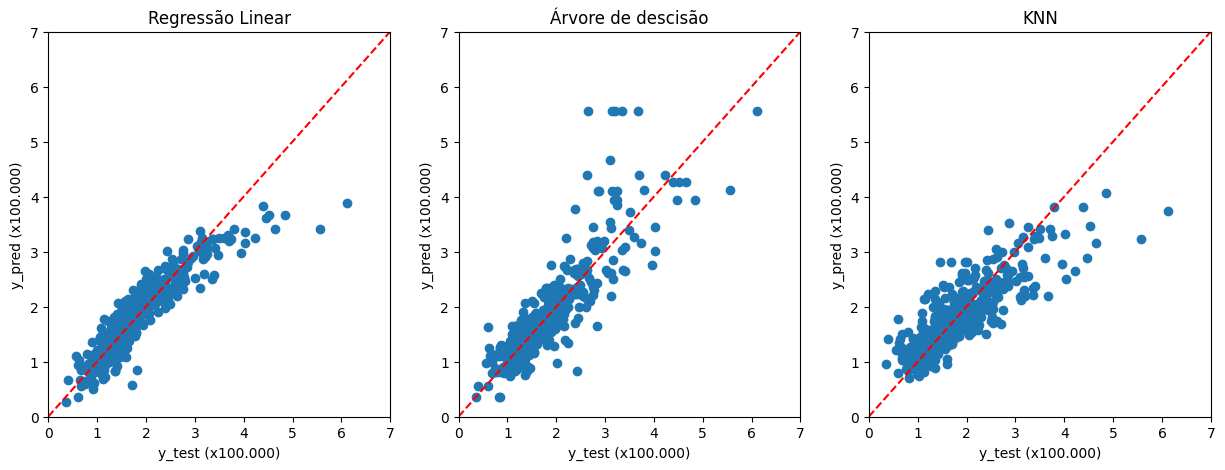

In [22]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,7],[0,7],'--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,7],[0,7],'--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,7],[0,7],'--r')


ax[0].set_title('Regressão Linear')
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set(xlim=(0, 7),ylim=(0, 7))

ax[1].set_title('Árvore de descisão')
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set(xlim=(0, 7),ylim=(0, 7))

ax[2].set_title('KNN')
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set(xlim=(0, 7),ylim=(0, 7))

plt.show()

*Fazendo a previsão para a base de teste da competição*

In [23]:
#Importanto a base de teste
teste=pd.read_csv('test.csv')

In [24]:
((teste.isnull().sum()/teste.shape[0]*100)).sort_values(ascending=False).head()

PoolQC         99.794380
MiscFeature    96.504455
Alley          92.666210
Fence          80.123372
MasVnrType     61.274846
dtype: float64

In [25]:
#Manter somente as colunas com dados numéricos
str_col=teste.columns[teste.dtypes!= 'object']
teste=teste.loc[:,str_col]

In [26]:
#Selecionar as colunas a serem excluídas com muitos valores vazios
eliminar=teste.columns[(teste.isnull().sum()/teste.shape[0])>0.1]
teste=teste.drop(eliminar,axis=1)

In [27]:
#Verificar valores nulos 
teste.isnull().sum().sort_values(ascending=False).head()

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
dtype: int64

In [28]:
#Substituir os valores nulos por -1
teste=teste.fillna(-1)
teste.isnull().sum().sort_values(ascending=False).head(3)

Id              0
MSSubClass      0
BedroomAbvGr    0
dtype: int64

In [29]:
y_pred=reg_rl.predict(teste)

In [30]:
teste['SalePrice']=y_pred

In [31]:
base_kaggle=teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [32]:
base_kaggle.to_csv('resultado1.csv',index=False)